In [803]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [804]:
# pobranie danych z bazy
mnist_test = pd.read_csv(r'mnist_test.csv', header=None)
mnist_train = pd.read_csv(r'mnist_train.csv', header=None)

In [805]:
# wymiar danych
print(mnist_test.shape, mnist_train.shape)

(10000, 785) (60000, 785)


In [806]:
# potasowanie danych
mnist_train = mnist_train.sample(frac=1).reset_index(drop=True)
mnist_test = mnist_test.sample(frac = 1).reset_index(drop=True)

In [807]:
# wyświetlenie pięć pierwszych elementów z zbioru treningowego
mnist_train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [808]:
# zapisanie wartości z bazy mnist_train do listy bez pierwszej kolumny, która zawiera informacje o cyfrze
trainingSet = mnist_train.iloc[:2000].drop(0, axis=1).values 
# zapisanie pierwszej kolumny do listy
train_label = mnist_train.iloc[:2000,0] 

testingSet = mnist_test.iloc[:50].drop(0, axis=1).values
test_label = mnist_test.iloc[:50,0]

In [809]:
# wyświetlenie zmienionych danych
trainingSet

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [810]:
train_label

0       2
1       5
2       5
3       1
4       1
       ..
1995    1
1996    0
1997    0
1998    5
1999    4
Name: 0, Length: 2000, dtype: int64

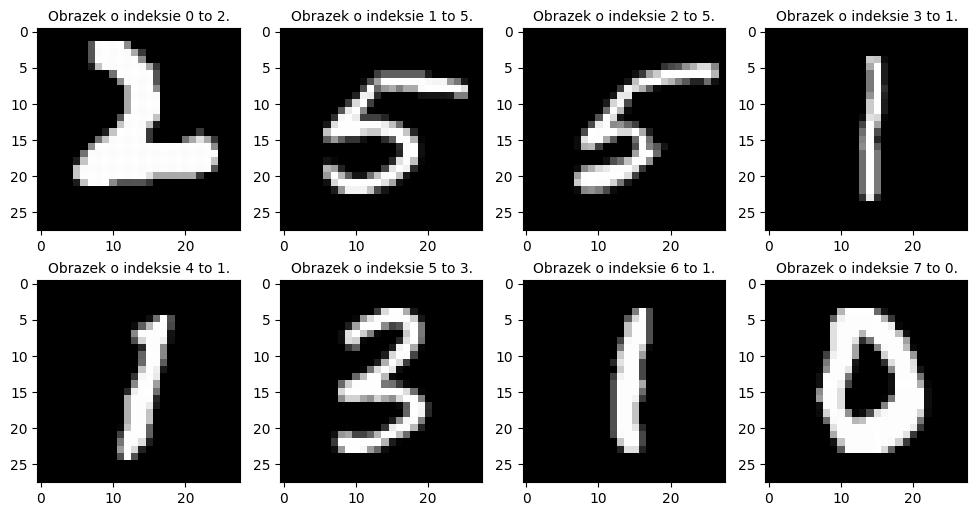

In [811]:
# pokazanie obrazków
plt.figure(figsize=(12,6))
for i in range(8):
    x = trainingSet[i] # dostanie zwektoryzowanego obrazka
    x = x.reshape((28,28)) # zmienienie formatu na 28x28
    plt.subplot(2,4,i+1)
    plt.imshow(x, cmap='gray') # pokazanie obrazka
    plt.text(1,-1.5,'Obrazek o indeksie %d to %d.' %(i, train_label[i]))

In [812]:
# obliczenie za pomocą algorytmu k najbliższych sąsiadów najbardziej prawdopodobnej cyfry
class KNN:
    @staticmethod
    def Clustering(x, sample, k, train_label):
        # obliczenie dystansu pomiędzy sample, a każdym wektorem w bazie x, za pomocą Minkowskiego
        distance = []
        for i in range(len(x)-1):
            temp = 0
            for j in range(len(sample)):
                temp += abs(x[i][j]-sample[j])**2
            distance = np.append(distance, temp**(1/2)) # dodanie do tablicy dystans wyliczonej odległości
            
        # sortowanie elementów według indeksu do elementu k
        idx = np.argpartition(distance, k)

        # określenie która cyfra występuje najczęściej
        dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
        for i in range(k):
            dict[train_label[idx[i]]] += 1
            
        return(max(dict, key = dict.get)) # zwrócenie cyfry, która występuje najczęściej

1 / 50 
Przewidziano: 8 
Faktycznie: 8


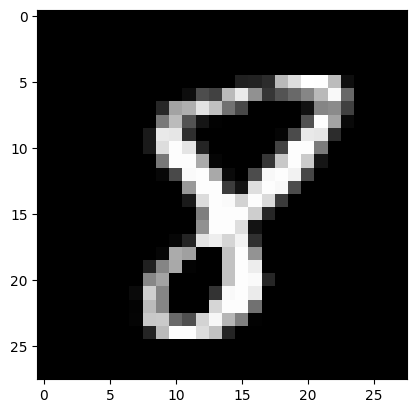

2 / 50 
Przewidziano: 4 
Faktycznie: 4


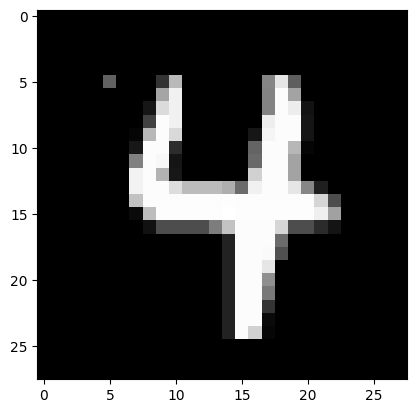

3 / 50 
Przewidziano: 0 
Faktycznie: 0


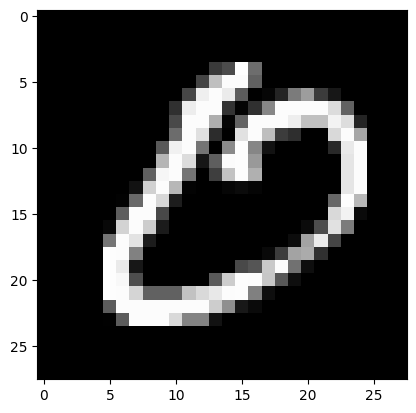

4 / 50 
Przewidziano: 1 
Faktycznie: 1


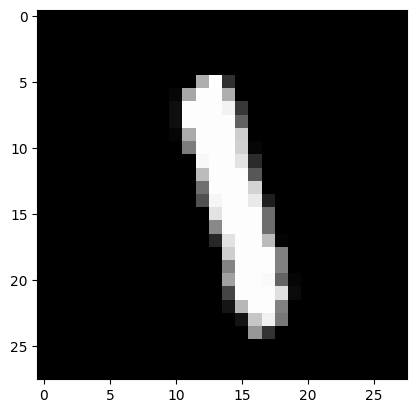

5 / 50 
Przewidziano: 3 
Faktycznie: 3


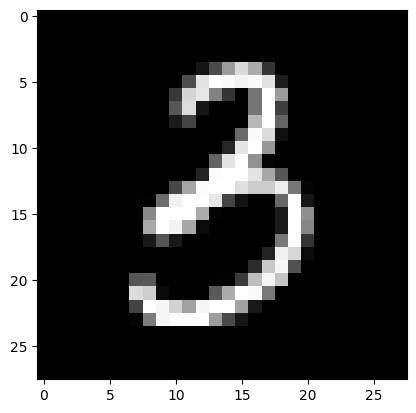

6 / 50 
Przewidziano: 4 
Faktycznie: 4


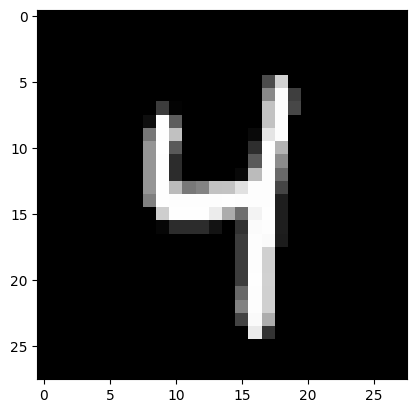

7 / 50 
Przewidziano: 2 
Faktycznie: 2


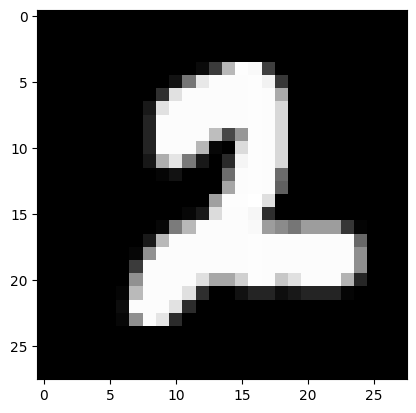

8 / 50 
Przewidziano: 7 
Faktycznie: 7


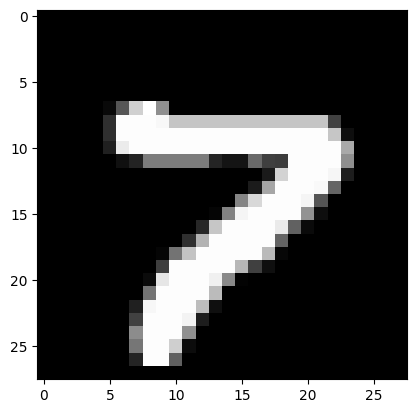

9 / 50 
Przewidziano: 2 
Faktycznie: 2


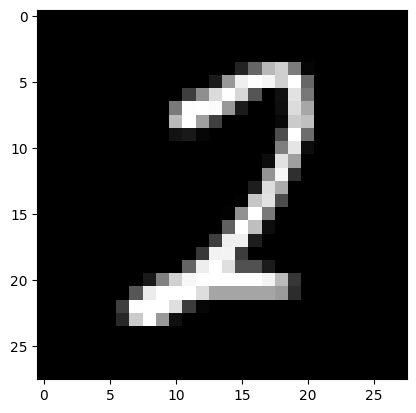

10 / 50 
Przewidziano: 6 
Faktycznie: 6


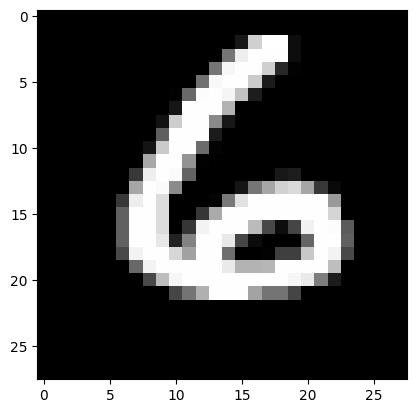

11 / 50 
Przewidziano: 4 
Faktycznie: 4


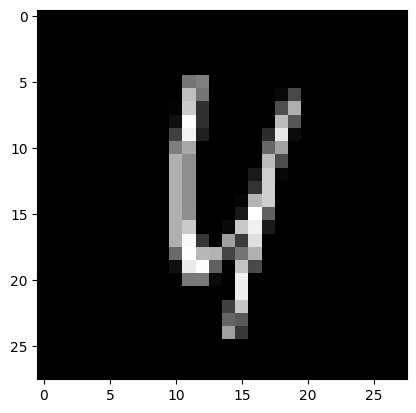

12 / 50 
Przewidziano: 5 
Faktycznie: 8


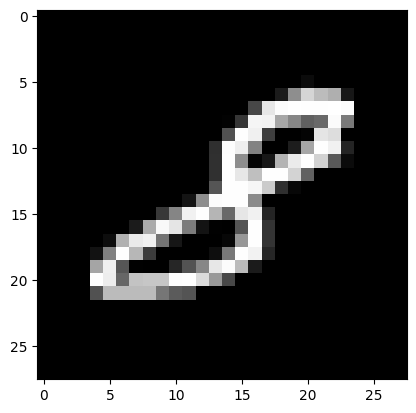

13 / 50 
Przewidziano: 5 
Faktycznie: 5


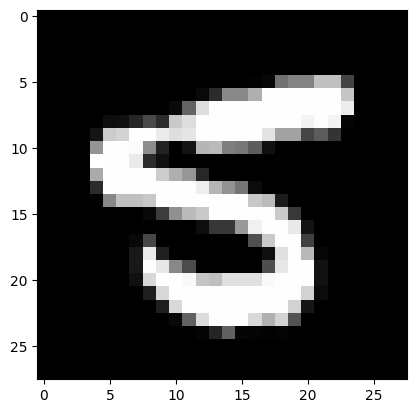

14 / 50 
Przewidziano: 2 
Faktycznie: 2


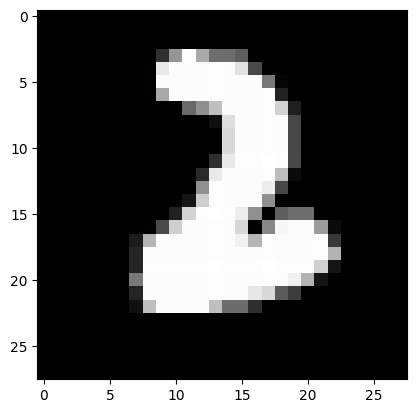

15 / 50 
Przewidziano: 5 
Faktycznie: 5


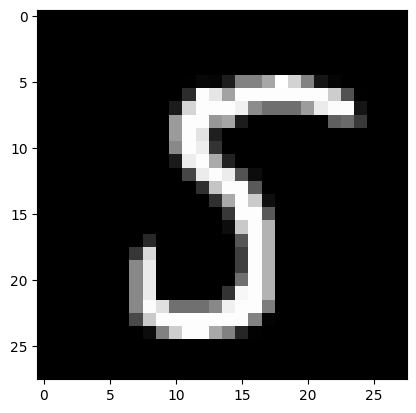

16 / 50 
Przewidziano: 1 
Faktycznie: 1


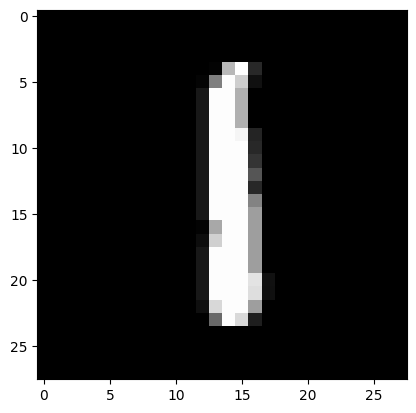

17 / 50 
Przewidziano: 6 
Faktycznie: 6


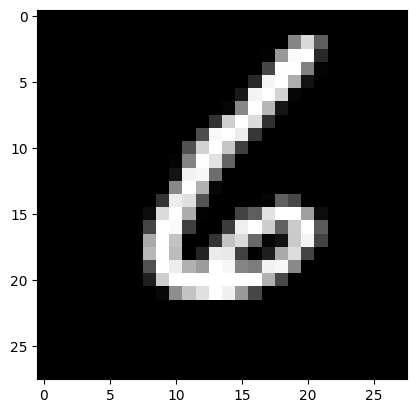

18 / 50 
Przewidziano: 8 
Faktycznie: 8


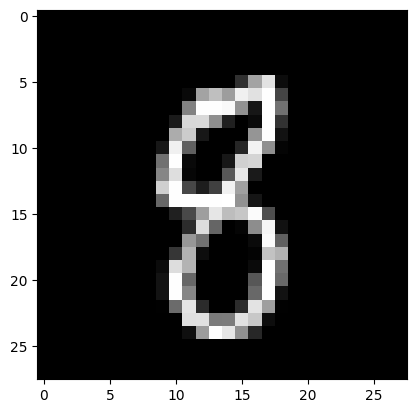

19 / 50 
Przewidziano: 7 
Faktycznie: 0


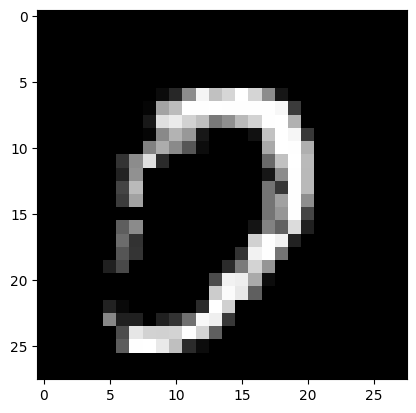

20 / 50 
Przewidziano: 3 
Faktycznie: 3


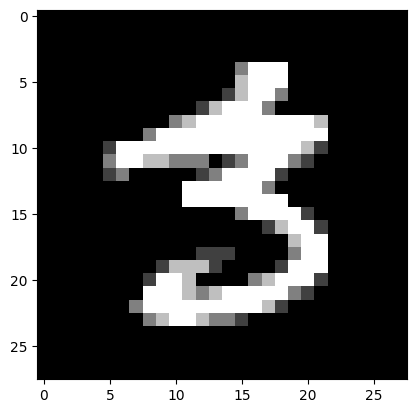

21 / 50 
Przewidziano: 3 
Faktycznie: 3


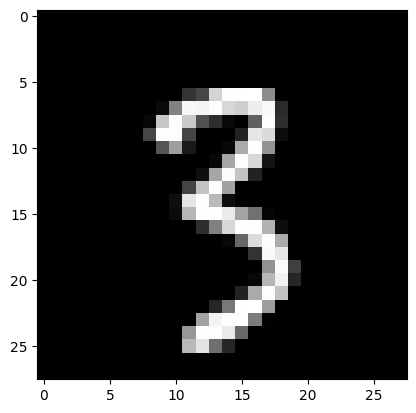

22 / 50 
Przewidziano: 6 
Faktycznie: 6


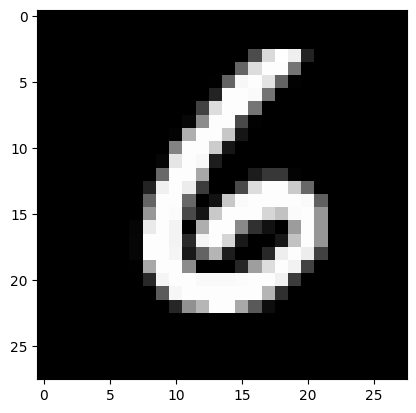

23 / 50 
Przewidziano: 6 
Faktycznie: 6


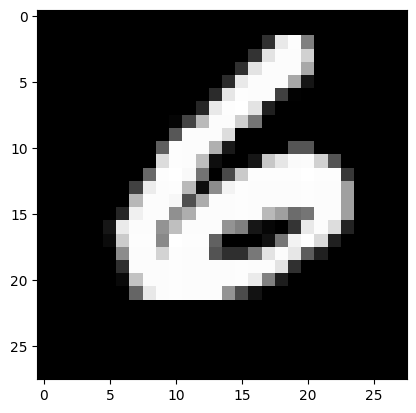

24 / 50 
Przewidziano: 6 
Faktycznie: 6


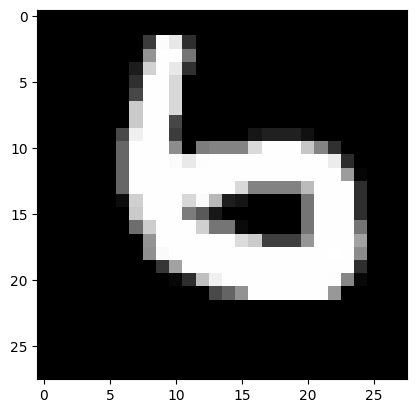

25 / 50 
Przewidziano: 4 
Faktycznie: 4


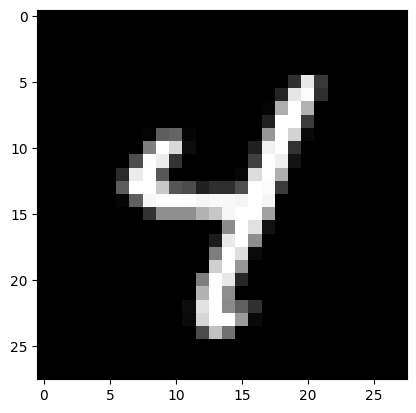

26 / 50 
Przewidziano: 1 
Faktycznie: 1


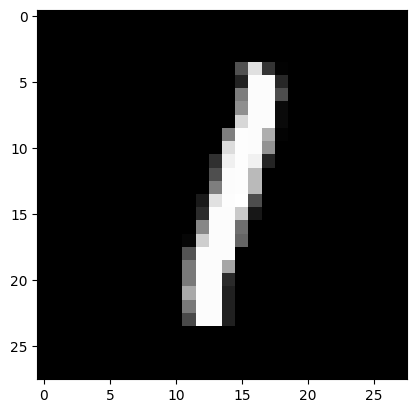

27 / 50 
Przewidziano: 0 
Faktycznie: 0


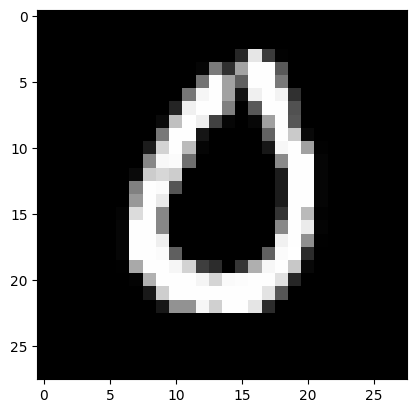

28 / 50 
Przewidziano: 4 
Faktycznie: 4


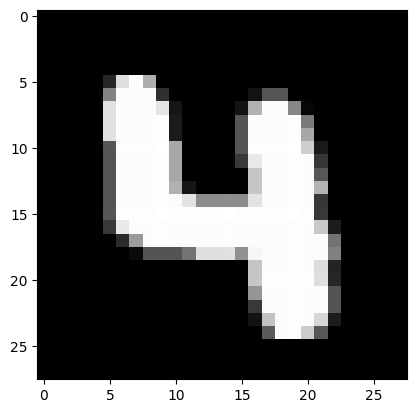

29 / 50 
Przewidziano: 5 
Faktycznie: 5


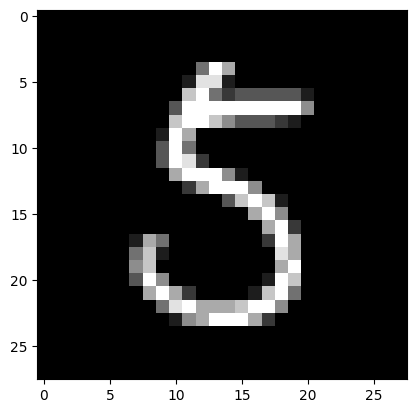

30 / 50 
Przewidziano: 4 
Faktycznie: 4


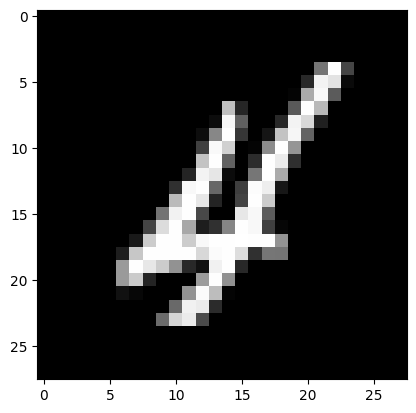

31 / 50 
Przewidziano: 0 
Faktycznie: 0


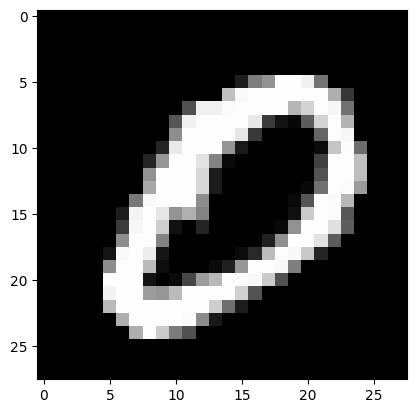

32 / 50 
Przewidziano: 1 
Faktycznie: 1


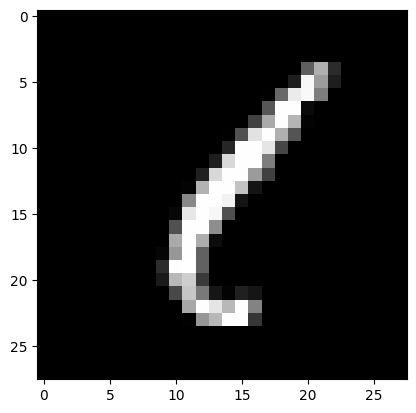

33 / 50 
Przewidziano: 3 
Faktycznie: 3


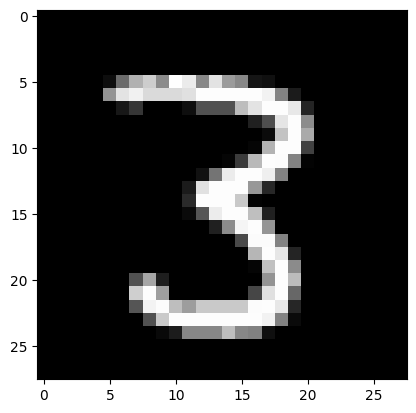

34 / 50 
Przewidziano: 4 
Faktycznie: 4


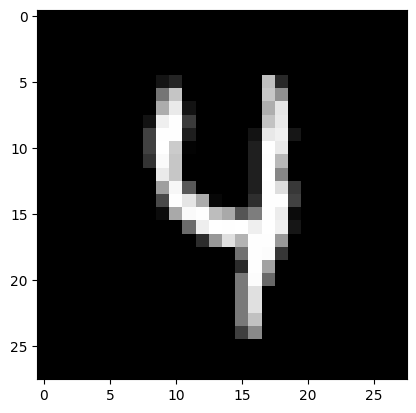

35 / 50 
Przewidziano: 9 
Faktycznie: 9


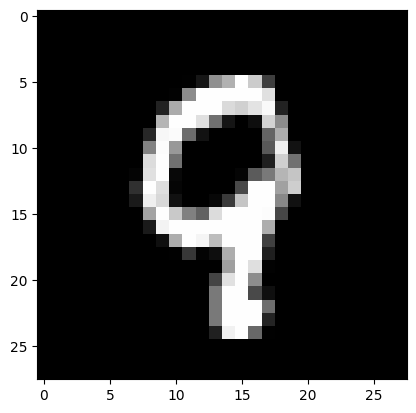

36 / 50 
Przewidziano: 8 
Faktycznie: 8


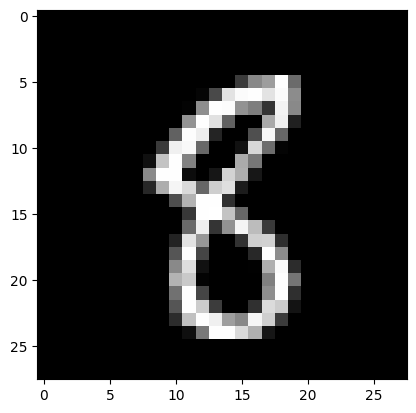

37 / 50 
Przewidziano: 7 
Faktycznie: 7


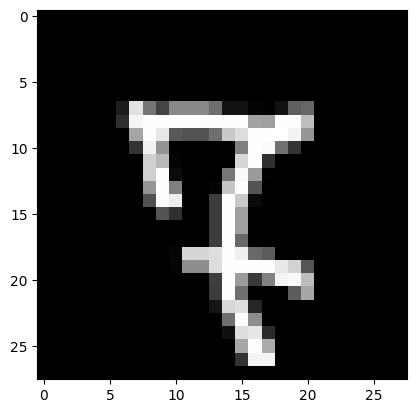

38 / 50 
Przewidziano: 3 
Faktycznie: 3


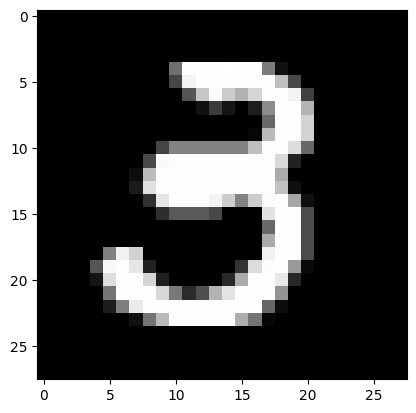

39 / 50 
Przewidziano: 5 
Faktycznie: 5


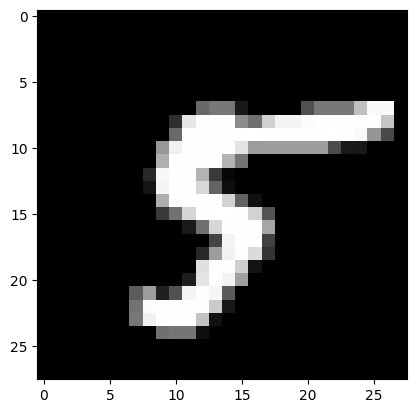

40 / 50 
Przewidziano: 3 
Faktycznie: 9


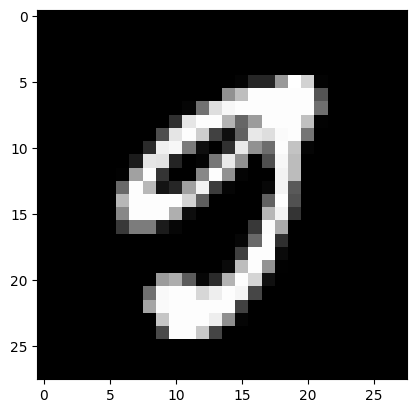

41 / 50 
Przewidziano: 0 
Faktycznie: 0


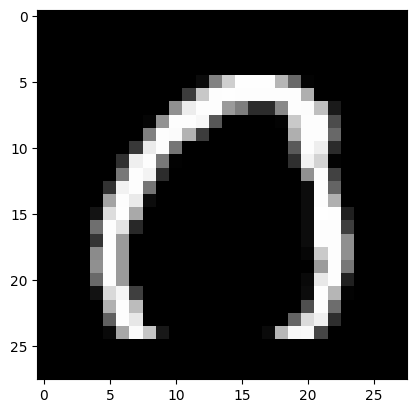

42 / 50 
Przewidziano: 1 
Faktycznie: 1


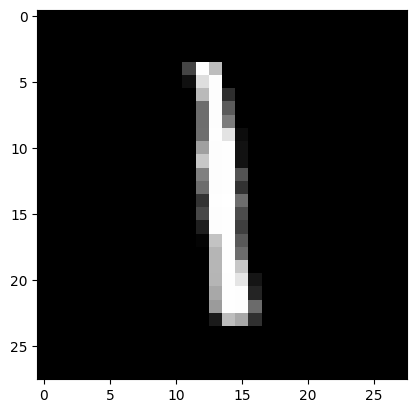

43 / 50 
Przewidziano: 4 
Faktycznie: 4


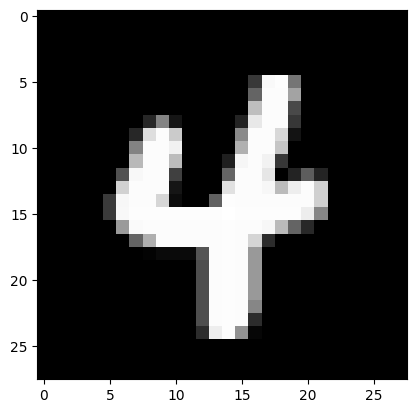

44 / 50 
Przewidziano: 3 
Faktycznie: 3


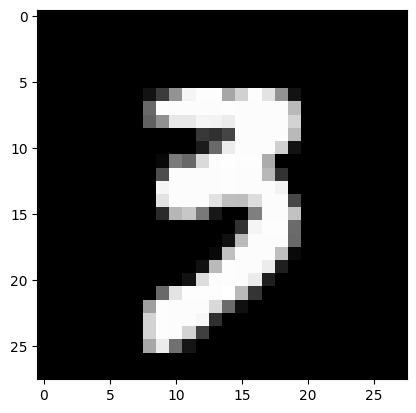

45 / 50 
Przewidziano: 1 
Faktycznie: 1


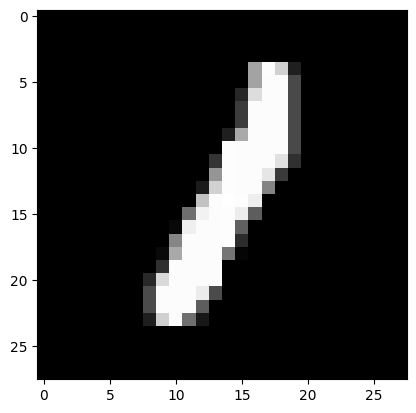

46 / 50 
Przewidziano: 1 
Faktycznie: 7


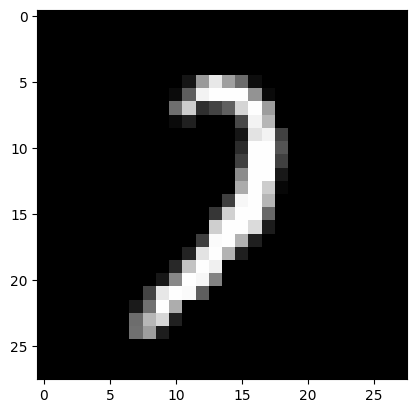

47 / 50 
Przewidziano: 9 
Faktycznie: 9


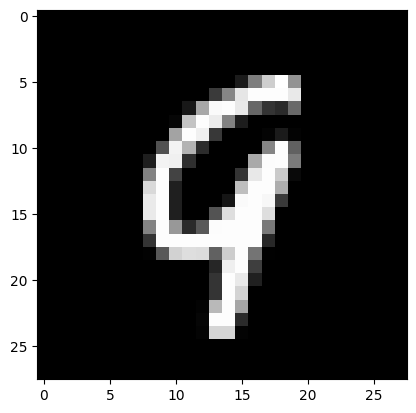

48 / 50 
Przewidziano: 2 
Faktycznie: 2


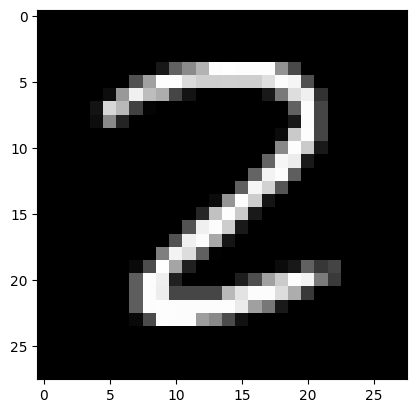

49 / 50 
Przewidziano: 1 
Faktycznie: 1


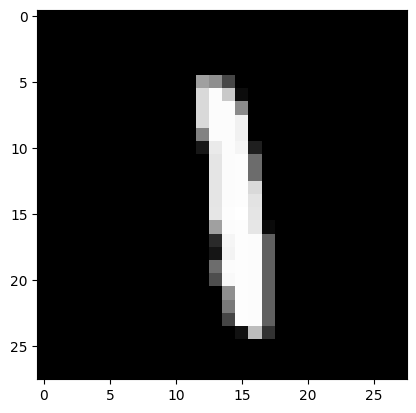

50 / 50 
Przewidziano: 5 
Faktycznie: 8


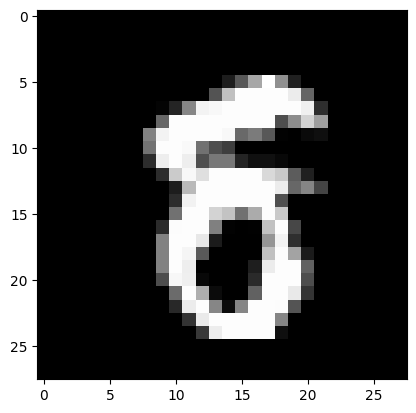

Skuteczność wynosi 90.0 %


In [813]:
# obliczenie skuteczności algorytmu 
counter = 0
for i in range(len(testingSet)):
    tmp = KNN.Clustering(trainingSet, testingSet[i], 2, train_label)
    if tmp == test_label[i]:
        counter += 1
    x = testingSet[i] 
    x = x.reshape((28,28)) 
    print(i+1, "/", len(testingSet), "\nPrzewidziano:", tmp, "\nFaktycznie:", test_label[i])
    plt.imshow(x, cmap='gray')   
    plt.show() 
skutecznosc=counter/len(testingSet)*100
print("Skuteczność wynosi",skutecznosc,"%")